Source available on [Nbviewer](http://nbviewer.ipython.org/github/stephanie-w/brainscribble/blob/master/source/plotting-last-earthquakes-on-a-map.ipynb)

The USGS Earthquake Hazards Program is part of the National Earthquake Hazards Reduction Program (NEHRP) and provides several data on earthquake location and magnitude.

The data on earthquakes of the last 30 months is avaiblable at http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.cs

In [12]:
# Render our plots inline
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

### Loading data

In [13]:
dset = pd.read_csv("http://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/4.5_month.csv",
                   parse_dates=['time'])

In [14]:
dset[:3]

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2015-08-30 14:38:41.930000,37.1312,57.7960,12.73,4.9,mb,NaN,61,0.836,0.82,us,us1000365u,2015-08-30T16:31:46.684Z,"26km ENE of Esfarayen, Iran",earthquake
1,2015-08-30 13:28:01.470000,37.7844,21.2488,8.84,4.7,mb,NaN,44,0.809,1.35,us,us1000365n,2015-08-30T14:50:51.030Z,"5km SW of Savalia, Greece",earthquake
2,2015-08-30 13:17:34.570000,27.6311,85.6385,10.00,4.5,mb,NaN,83,1.089,0.67,us,us1000365l,2015-08-30T16:27:43.556Z,"11km E of Banepa, Nepal",earthquake


### Drawing the map

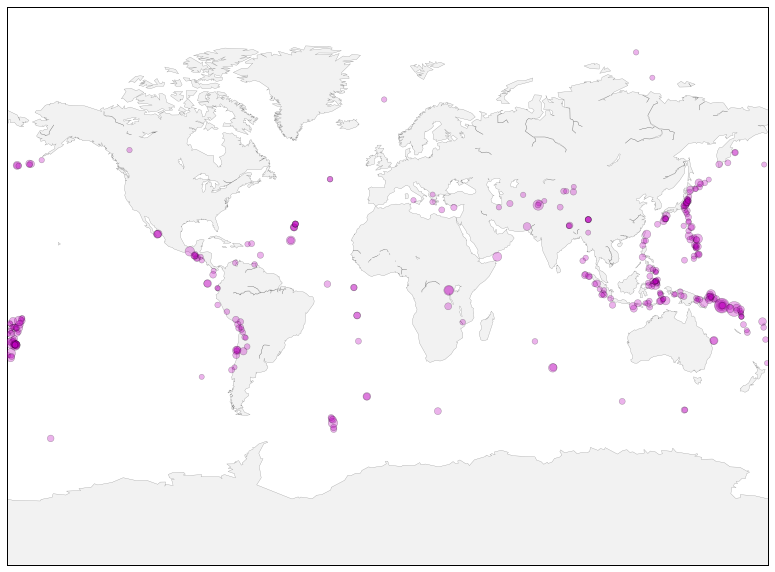

In [31]:
fig = plt.figure(figsize=(14,10))
ax = plt.subplot(1,1,1)
# miller projection
map = Basemap(projection='mill')
x, y = map(dset["longitude"].values, dset["latitude"].values)
magnitude = dset["mag"].values
map.drawcoastlines(color='0.50', linewidth=0.25)
map.fillcontinents(color='0.95')
map.scatter(x,y,s=np.exp(magnitude)*0.3, lw=0.5,
            alpha=0.3, zorder=10, c="m")
plt.show() 